In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/moon-landings/Moonlanding.csv


In [2]:
#importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# ****Data Cleaning and EDA****

In [3]:
moon_df = pd.read_csv("/kaggle/input/moon-landings/Moonlanding.csv",encoding="ISO-8859-1")

In [4]:
moon_df.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,17-Aug-58,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,23-Sep-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,11-Oct-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,11-Oct-58,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,08-Nov-58,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [5]:
moon_df.shape

(158, 8)

In [6]:
moon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mission                 158 non-null    object
 1   Spacecraft              158 non-null    object
 2   Launch Date             158 non-null    object
 3   Carrier Rocket          158 non-null    object
 4   Operator                158 non-null    object
 5   Mission Type            158 non-null    object
 6   Outcome                 158 non-null    object
 7   Additional Information  157 non-null    object
dtypes: object(8)
memory usage: 10.0+ KB


In [7]:
#changing the dtype of column launch date
moon_df["Launch Date"] = pd.to_datetime(moon_df["Launch Date"])
moon_df.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information
0,Pioneer 0 (Able I),Pioneer 0,2058-08-17,Thor DM-18 Able I,United States USAF,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...
1,Luna E-1 No.1,Luna E-1 No.1,2058-09-23,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...
2,Pioneer 1 (Able II),Pioneer 1,2058-10-11,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...
3,Luna E-1 No.2,Luna E-1 No.2,2058-10-11,Luna,Soviet Union OKB-1,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...
4,Pioneer 2 (Able III),Pioneer 2,2058-11-08,Thor DM-18 Able I,United States NASA,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...


In [8]:
#to get the number of unique items in each column
for column in moon_df.columns:
    print(column , ":", moon_df[column].nunique())

Mission : 147
Spacecraft : 158
Launch Date : 124
Carrier Rocket : 51
Operator : 22
Mission Type : 13
Outcome : 6
Additional Information : 151


In [9]:
print(moon_df["Launch Date"].value_counts()[:5])
print(moon_df["Operator"].value_counts()[:10])

2022-11-16    11
2022-12-11     4
2020-11-23     4
2018-05-21     3
2014-10-23     3
Name: Launch Date, dtype: int64
United States NASA        61
Soviet Union Lavochkin    39
China CNSA                15
Soviet Union OKB-1        15
Japan JAXA                 5
India ISRO                 4
Japan ISAS                 3
European Union ESA         2
Italy ASI                  1
UAE UAESA/MBRSC            1
Name: Operator, dtype: int64


In [10]:
#adding the year column to the dataset
moon_df["Year"] = moon_df["Launch Date"].dt.year

#changing the operator column a bit
def operator(c):
    if "United States" in c:
        name = "US"
    elif "Soviet Union" in c:
        name = "Russia"
    elif "China" in c:
        name = "China"
    elif "European Union" in c:
        name = "EU"
    else:
        p = c.split(" ")
        name = p[0]
    return name
moon_df["Operator"] = moon_df["Operator"].apply(operator)

moon_df.head()

,Mission,Spacecraft,Launch Date,Carrier Rocket,Operator,Mission Type,Outcome,Additional Information,Year
0,Pioneer 0 (Able I),Pioneer 0,2058-08-17,Thor DM-18 Able I,US,Orbiter,Launch failure,First attempted launch beyond Earth orbit; fai...,2058
1,Luna E-1 No.1,Luna E-1 No.1,2058-09-23,Luna,Russia,Impactor,Launch failure,Failed to orbit; rocket disintegrated due to e...,2058
2,Pioneer 1 (Able II),Pioneer 1,2058-10-11,Thor DM-18 Able I,US,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...,2058
3,Luna E-1 No.2,Luna E-1 No.2,2058-10-11,Luna,Russia,Impactor,Launch failure,Failed to orbit; carrier rocket exploded due t...,2058
4,Pioneer 2 (Able III),Pioneer 2,2058-11-08,Thor DM-18 Able I,US,Orbiter,Launch failure,Failed to orbit; premature second-stage cutoff...,2058


# ****Data Visualizations****

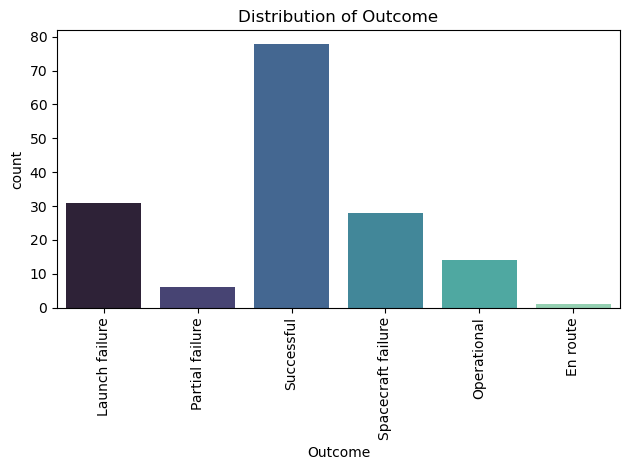

In [11]:
moon_df["Outcome"].value_counts()
sns.countplot(x = moon_df["Outcome"], palette = "mako")
plt.xticks(rotation = 90)
plt.title("Distribution of Outcome")
plt.tight_layout();

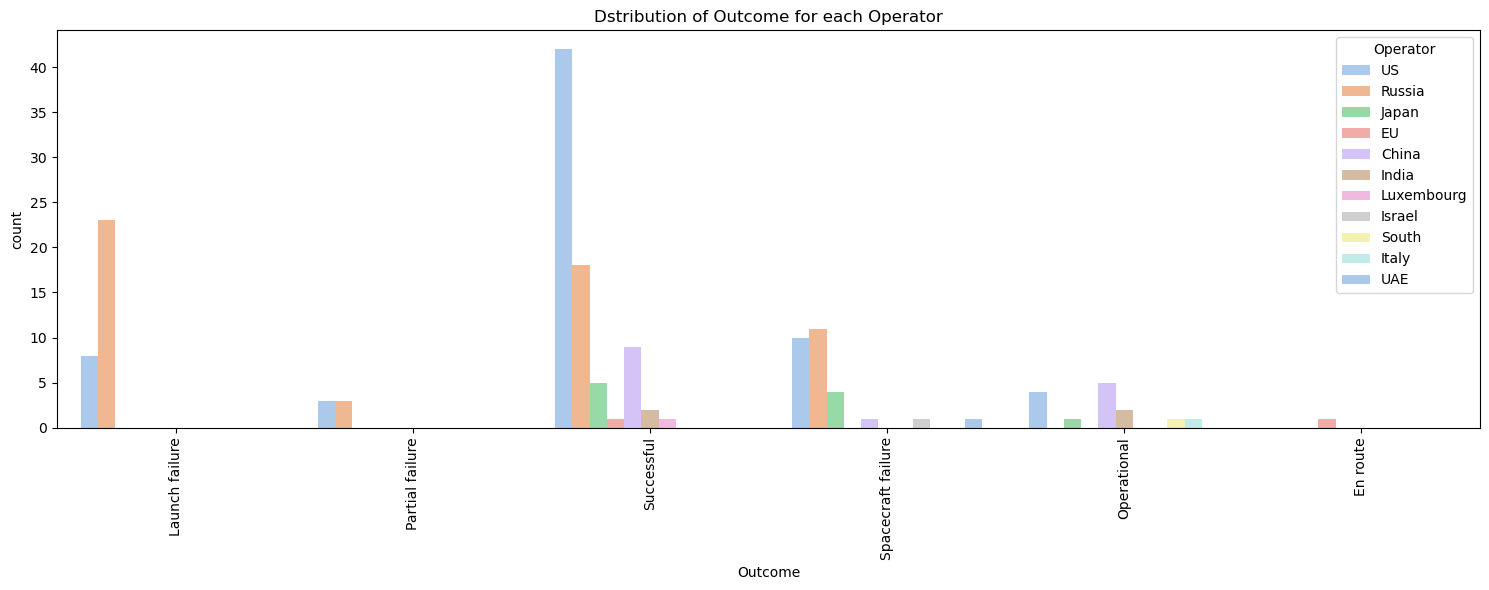

In [12]:
plt.figure(figsize = (15,6))
sns.countplot(x = moon_df["Outcome"], hue = moon_df["Operator"]
              , palette = "pastel")
plt.xticks(rotation = 90)
plt.title("Dstribution of Outcome for each Operator")
#plt.legend(loc = "upper right")
plt.tight_layout();

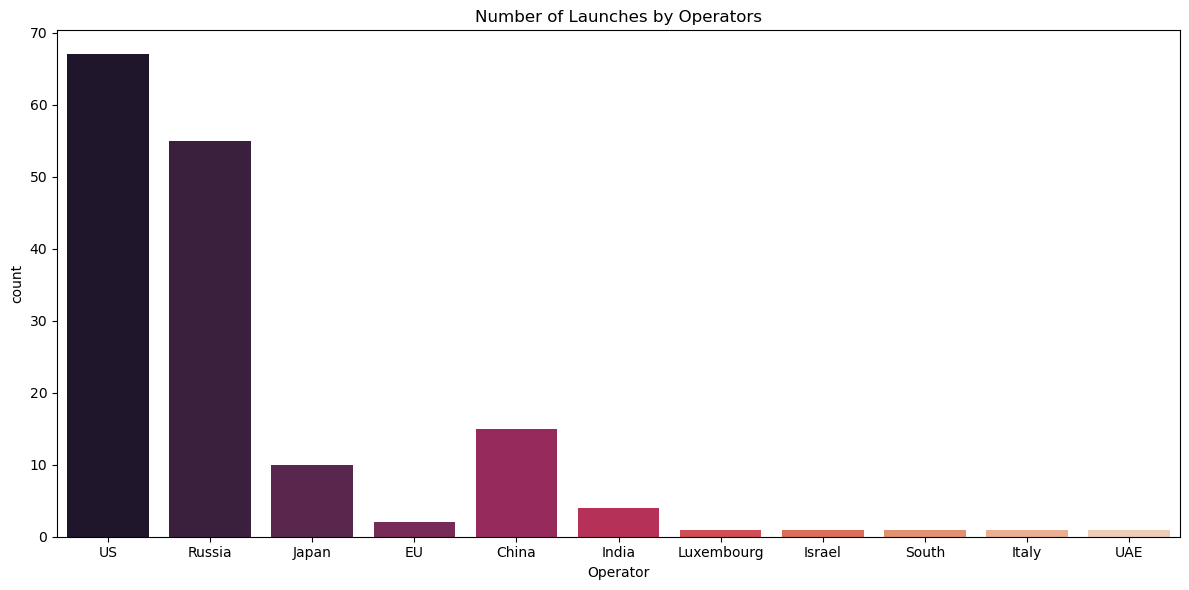

In [13]:
#countplot for operators
plt.figure(figsize = (12,6))
sns.countplot(x = moon_df["Operator"], palette = "rocket")
plt.title("Number of Launches by Operators")
plt.tight_layout();

In [14]:
#creating a chloropeth of the operators
df = moon_df["Operator"].value_counts()
#creating a dataframe for operator
operator_df = pd.DataFrame({'operators': df.index, 'launches': df.values})

fig = px.choropleth(operator_df, 
                    locations="operators", 
                    locationmode='country names', 
                    color="launches", 
                    hover_name="operators",
                    #color_continuous_scale='',
                    title="Number of Launches by Operator",
                    labels={'launches': 'Number of Launches'}
                   )
fig.show()

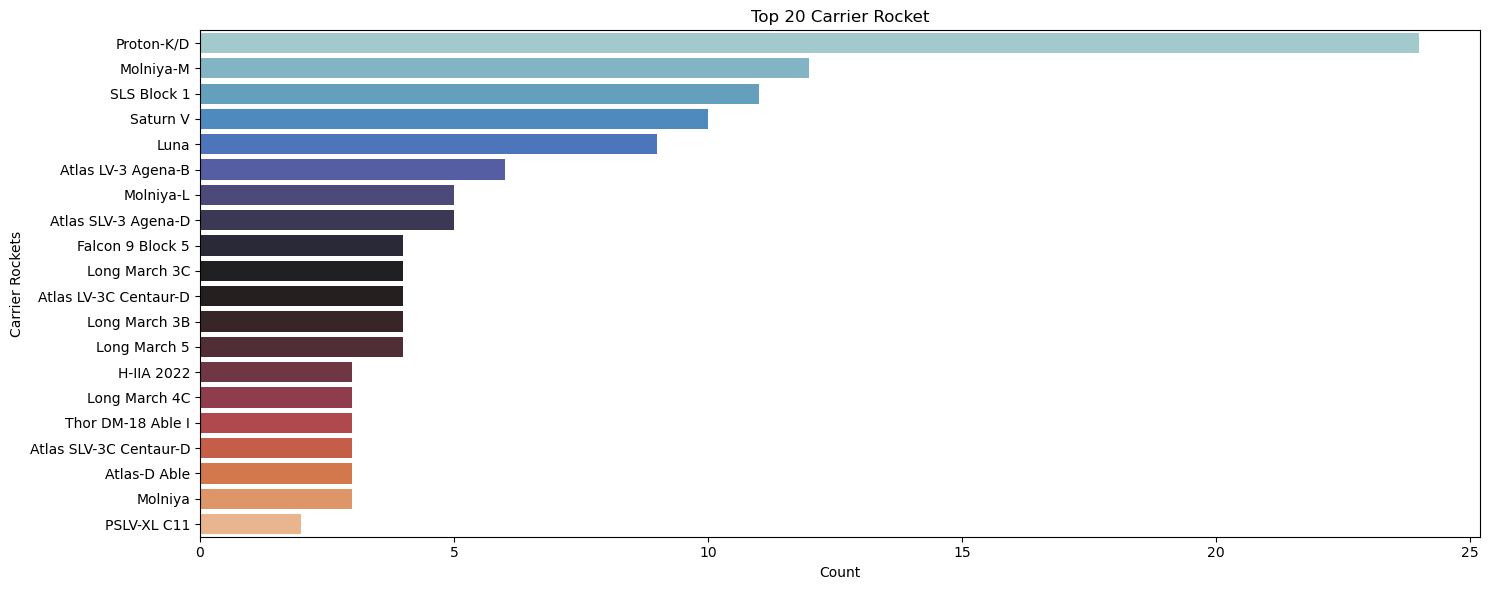

In [15]:
#distribution of carrier rockets
ccr = (moon_df["Carrier Rocket"].value_counts().to_frame().reset_index()).head(20)
plt.figure(figsize = (15,6))
sns.barplot(y = ccr["index"], x = ccr["Carrier Rocket"], palette = "icefire")
plt.title("Top 20 Carrier Rocket")
plt.ylabel("Carrier Rockets")
plt.xlabel("Count")
plt.tight_layout();

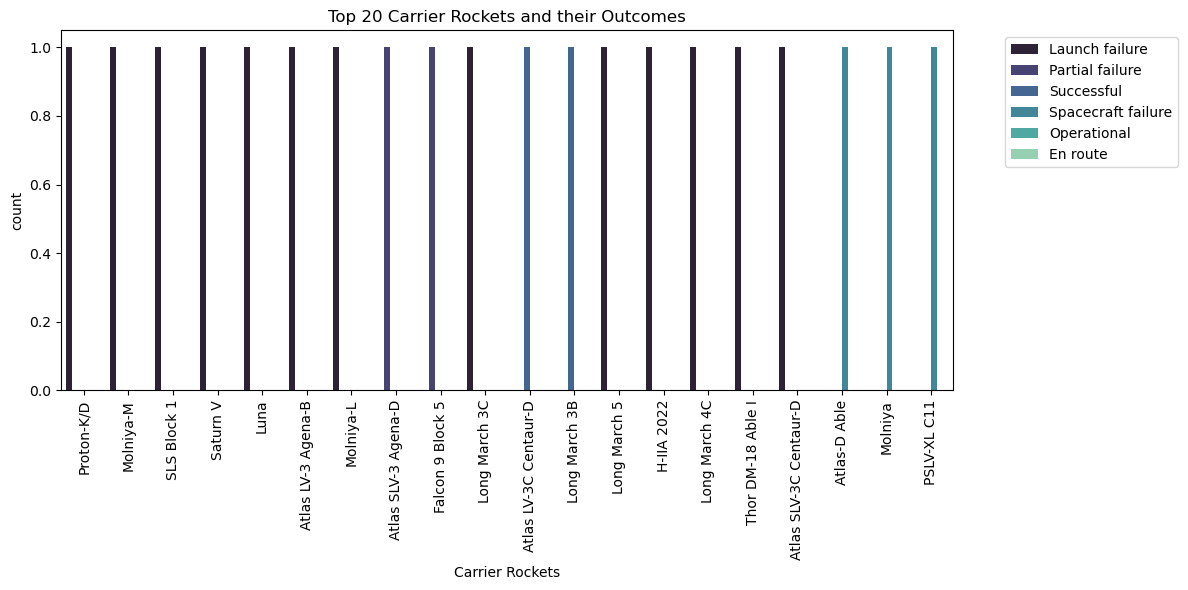

In [16]:
#visualization for the top 20 carrier rockets and their outcomes
plt.figure(figsize = (12,6))
sns.countplot(x= ccr["index"], hue = moon_df["Outcome"], palette = "mako")
plt.xlabel("Carrier Rockets")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Top 20 Carrier Rockets and their Outcomes")
plt.tight_layout()

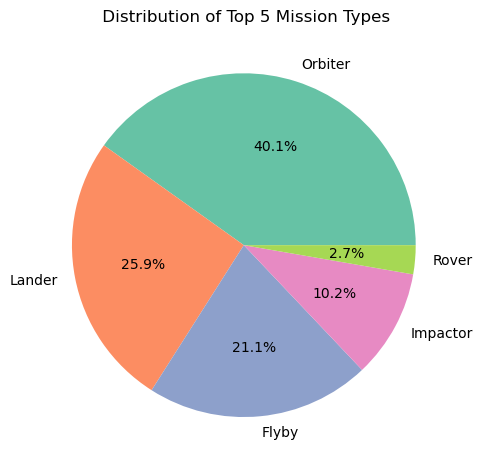

In [17]:
#distribution of mission type
mission = dict(moon_df["Mission Type"].value_counts().head(5))
palette_color = sns.color_palette("Set2")
plt.pie(mission.values(), labels= mission.keys(), colors = palette_color, autopct="%1.1f%%")
plt.title(" Distribution of Top 5 Mission Types")
plt.tight_layout();

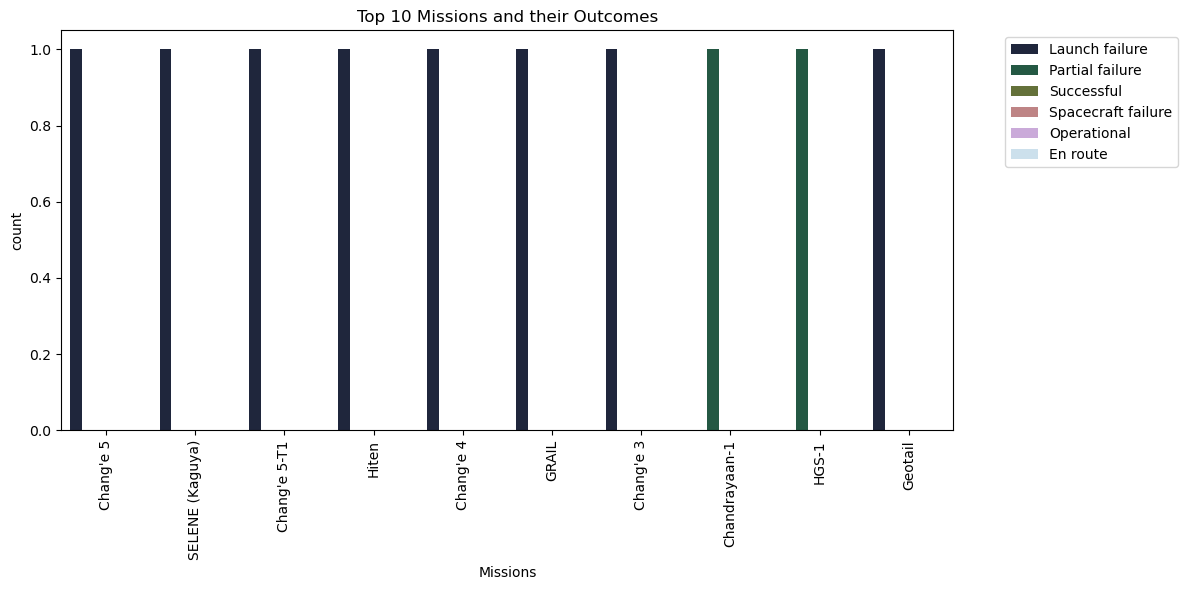

In [18]:
#visualization for the top 10 missions and their outcomes
plt.figure(figsize = (12,6))
ms = moon_df["Mission"].value_counts().to_frame().reset_index().head(10)
ms
sns.countplot(x= ms["index"], hue = moon_df["Outcome"], palette = "cubehelix")
plt.xlabel("Missions")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Top 10 Missions and their Outcomes")
plt.tight_layout()

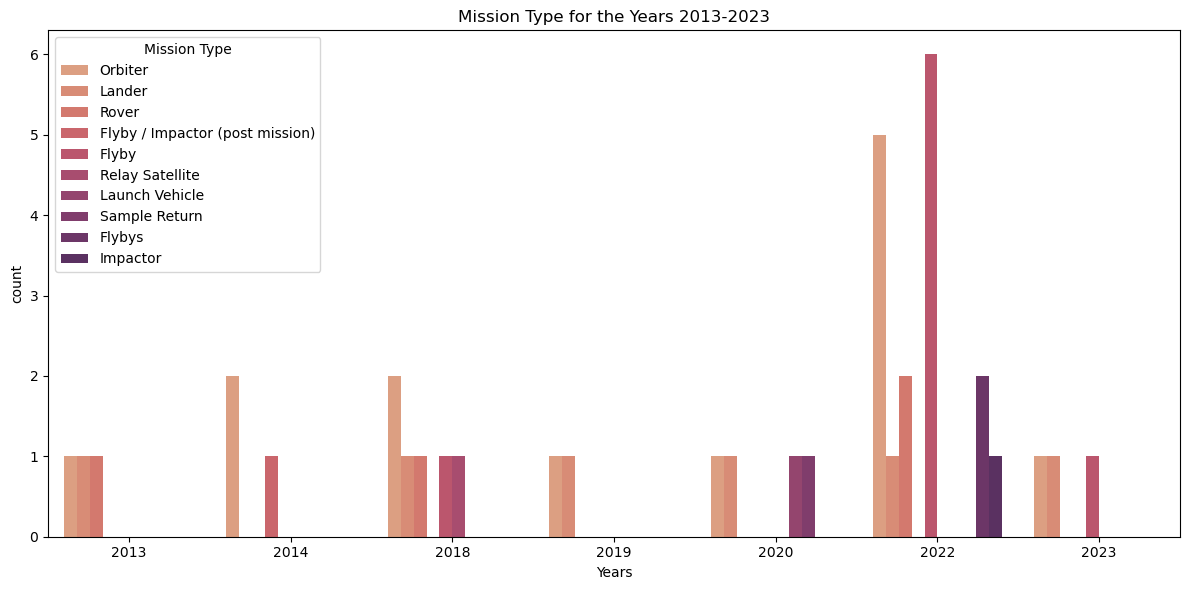

In [19]:
## mission type for year 2013-2023

#creating a dataframe with just years from 2013-2023
new_moon_df = moon_df.loc[(moon_df["Year"] >= 2013) & (moon_df["Year"]<=2023)]

#plotting for the new df
plt.figure(figsize = (12,6))
sns.countplot(x = new_moon_df["Year"], hue = new_moon_df["Mission Type"], palette = "flare")
plt.title("Mission Type for the Years 2013-2023")
plt.xlabel("Years")
plt.tight_layout()

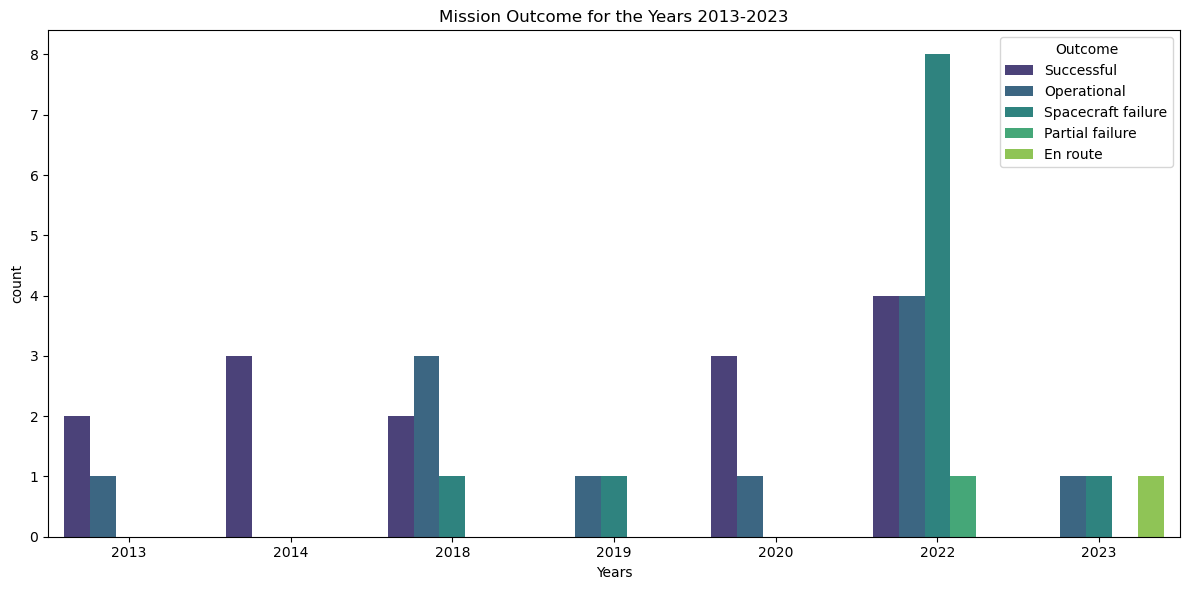

In [20]:
## mission outcome for year 2013-2023

#creating a dataframe with just years from 2013-2023
new_moon_df = moon_df.loc[(moon_df["Year"] >= 2013) & (moon_df["Year"]<=2023)]

#plotting for the new df
plt.figure(figsize = (12,6))
sns.countplot(x = new_moon_df["Year"], hue = new_moon_df["Outcome"], palette = "viridis")
plt.title("Mission Outcome for the Years 2013-2023")
plt.xlabel("Years")
plt.tight_layout()

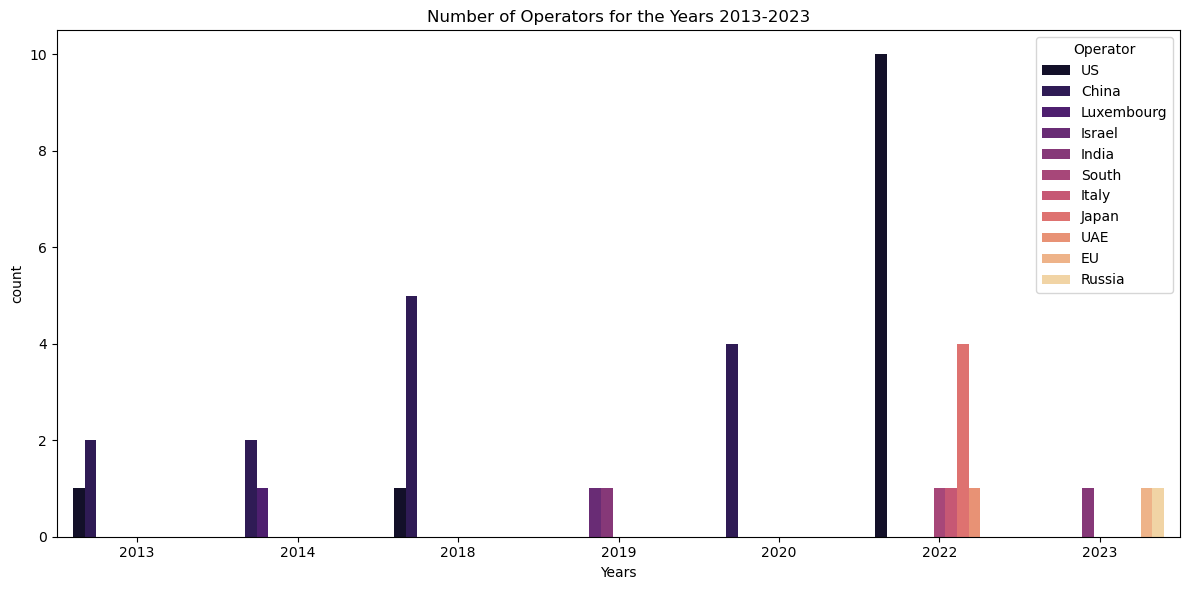

In [21]:
## operators launches for year 2013-2023

#creating a dataframe with just years from 2013-2023
new_moon_df = moon_df.loc[(moon_df["Year"] >= 2013) & (moon_df["Year"]<=2023)]

#plotting for the new df
plt.figure(figsize = (12,6))
sns.countplot(x = new_moon_df["Year"], hue = new_moon_df["Operator"], palette = "magma")
plt.title("Number of Operators for the Years 2013-2023")
plt.xlabel("Years")
plt.tight_layout();

# ****Predictive Analysis(ML)****

In [22]:
#import the necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [23]:
#reading the csv file
moon_df = pd.read_csv("/kaggle/input/moon-landings/Moonlanding.csv",index_col = False, encoding="ISO-8859-1")

#converting Launch date to the right dtype
moon_df["Launch Date"] = pd.to_datetime(moon_df["Launch Date"])

#creating a year column in the our df
moon_df["Year"] = moon_df["Launch Date"].dt.year

# Separate target from predictors
moon_df.dropna(axis=0, subset=['Outcome'], inplace=True)

target = moon_df.Outcome
y = target
X = moon_df.drop(['Outcome'], axis=1)

# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#moon_df.head()
# Drop column where the target is missing
#X_train.dropna(axis=0, subset=['Outcome'], inplace=True)

#selecting target and predictor
#target = X_train.Outcome

#cols_with_missing = [col for col in X_train.columns if X_train.isnull().any()]

c_train_predictors =X_train.drop(["Additional Information"], axis = 1)
c_test_predictors = X_test.drop(["Additional Information"], axis = 1)

In [24]:
#getting categorical columns with low cardinality
low_cardinality_cols = [cname for cname in c_train_predictors.columns if 
                                c_train_predictors[cname].nunique() < 50 and
                                c_train_predictors[cname].dtype == "object"]

#getting numerical columns
numeric_cols = [cname for cname in c_train_predictors.columns if 
                                c_train_predictors[cname].dtype in ['int64', 'float64']]
#add the two cols together
my_cols = low_cardinality_cols + numeric_cols
train_predictors = c_train_predictors[my_cols]
test_predictors = c_test_predictors[my_cols]

In [25]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

In [26]:
def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, 
                                scoring = 'neg_mean_absolute_error').mean()

#applying the get_mae function on our one_hot_encoded_training predictors
mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, final_train)
print('Mean Abslute Error for training set: ' + str(int(mae_one_hot_encoded)))

Mean Abslute Error for training set: 0


Note: I'll very much appreciate if you guys upvote my work and also provide feedback on how I can better improve my model. Thank you very much for checking my work out!